In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import random

In [2]:
df1 = pd.read_csv('data/1step.csv', index_col='time')
df2 = pd.read_csv('data/2step.csv', index_col='time')
df1_ratio = pd.read_csv('data/1step_percent.csv', index_col='time')
df2_ratio = pd.read_csv('data/2step_percent.csv', index_col='time')

In [3]:
# int columns
df1.columns = [int(i) for i in df1.columns]
df1.columns = [int(i) for i in df2.columns]
df1_ratio.columns = [int(i) for i in df1_ratio.columns]
df2_ratio.columns = [int(i) for i in df2_ratio.columns]

In [4]:
# random color generator
random.seed(38)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(20)]

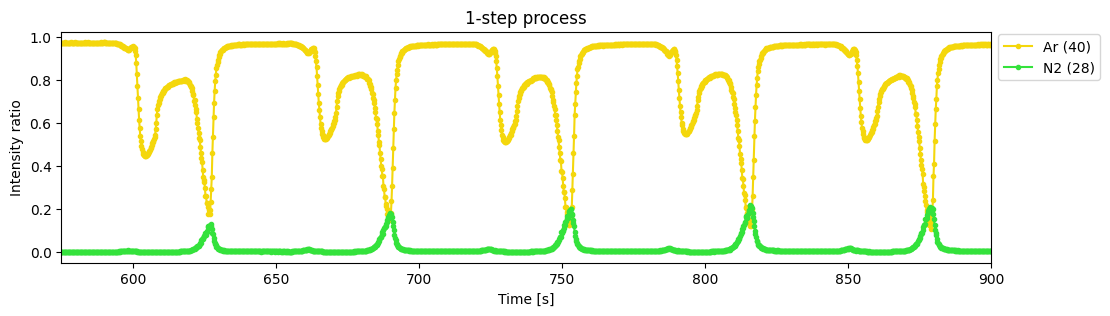

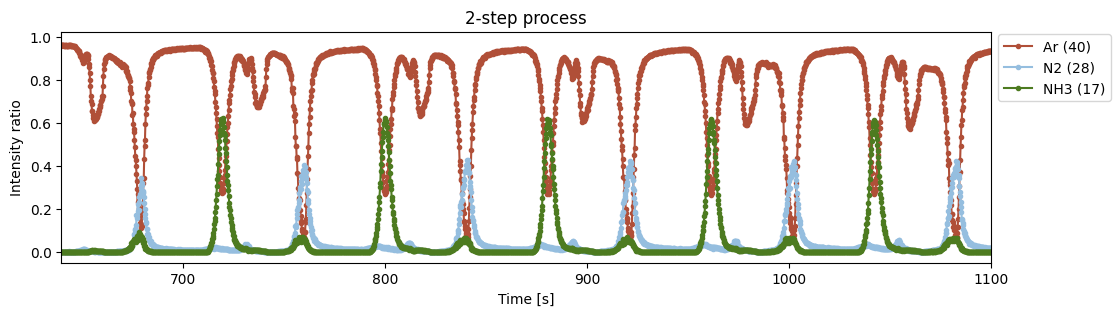

In [5]:
# intensity change of H2O (18)
plt.figure(figsize=(12,3))
plt.plot(df1_ratio.loc[:,40],'.-', color=colors[3])
plt.plot(df1_ratio.loc[:,17],'.-', color=colors[5])
plt.xlabel('Time [s]')
plt.xlim(575,900)
plt.ylabel('Intensity ratio')
plt.title('1-step process')
plt.legend(['Ar (40)','N2 (28)'], bbox_to_anchor=(1,1.02), loc='upper left')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(df2_ratio.loc[:,40],'.-', color=colors[4])
plt.plot(df2_ratio.loc[:,17],'.-', color=colors[6])
plt.plot(df2_ratio.loc[:,28],'.-', color=colors[9])
plt.xlabel('Time [s]')
plt.xlim(640,1100)
plt.ylabel('Intensity ratio')
plt.legend(['Ar (40)','N2 (28)','NH3 (17)'], bbox_to_anchor=(1,1.02), loc='upper left')
plt.title('2-step process')
plt.show()

# to check the start of the processes

In [23]:
df1_pre = df1_ratio.iloc[3000:4576]
df1_post = df1_ratio.iloc[4577:21911]
df2_pre = df2_ratio.iloc[3264:6894]
df2_post = df2_ratio.iloc[6895:35524]
df1_pre

,2,3,4,5,6,7,8,9,10,11,...,306,307,308,309,310,311,312,313,314,315
time,,,,,,,,,,,,,,,,,,,,,
600.0,0.000030,0.000018,0.000000,0.0,0.000000,0.000000,0.000000,0.000078,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
600.2,0.000023,0.000000,0.000041,0.0,0.000000,0.000022,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000019
600.4,0.000021,0.000000,0.000000,0.0,0.000000,0.000000,0.000015,0.000027,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
600.6,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
600.8,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000014,0.000015,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914.2,0.000053,0.000043,0.000000,0.0,0.000000,0.000000,0.000061,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
914.4,0.000000,0.000000,0.000020,0.0,0.000000,0.000000,0.000026,0.000000,0.000061,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
914.6,0.000024,0.000000,0.000020,0.0,0.000053,0.000000,0.000000,0.000000,0.000025,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [25]:
# std
df1_pre_std = df1_pre.agg(['std'])
df1_post_std = df1_post.agg(['std'])
df2_pre_std = df2_pre.agg(['std'])
df2_post_std = df2_post.agg(['std'])

In [29]:
df1_std = df1_pre_std.T
df1_std = df1_std.rename(columns={'std':'pre'})
df1_std['post'] = df1_post_std.T
df1_std = df1_std.reset_index()

df2_std = df2_pre_std.T
df2_std = df2_std.rename(columns={'std':'pre'})
df2_std['post'] = df2_post_std.T
df2_std = df2_std.reset_index()

df1_std

,index,pre,post
0,2,0.000039,0.000031
1,3,0.000025,0.000026
2,4,0.000039,0.000029
3,5,0.000042,0.000041
4,6,0.000027,0.000027
...,...,...,...
309,311,0.000007,0.000009
310,312,0.000006,0.000008
311,313,0.000005,0.000009
312,314,0.000010,0.000007


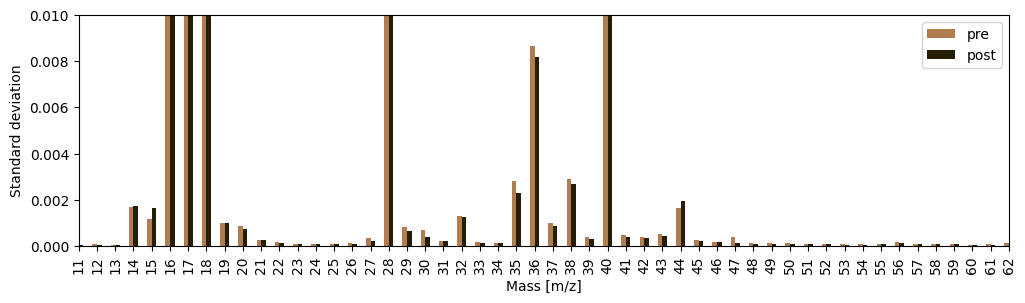

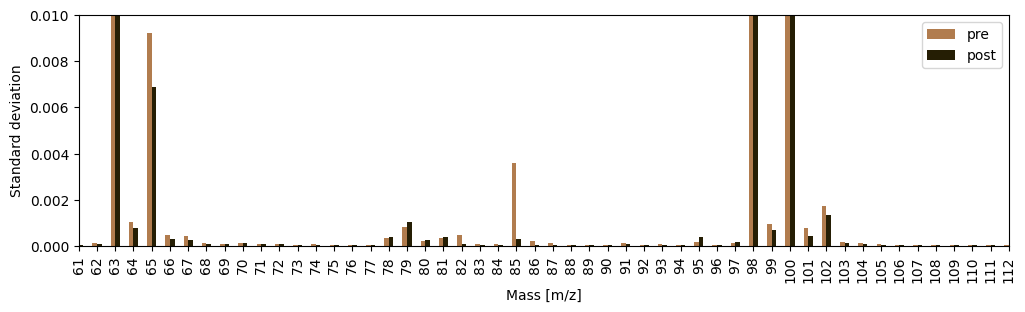

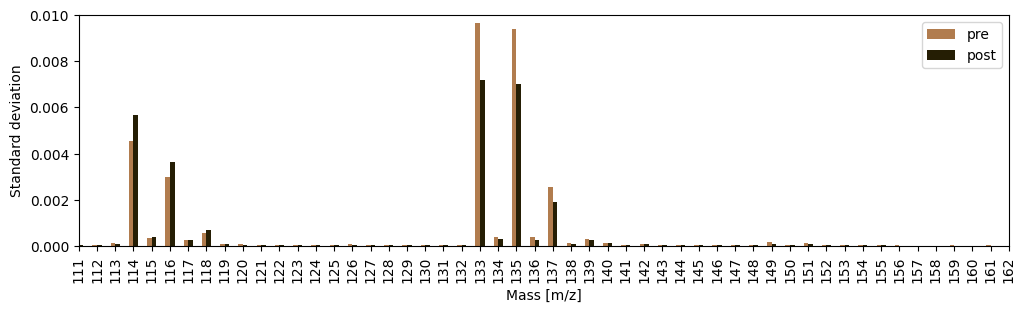

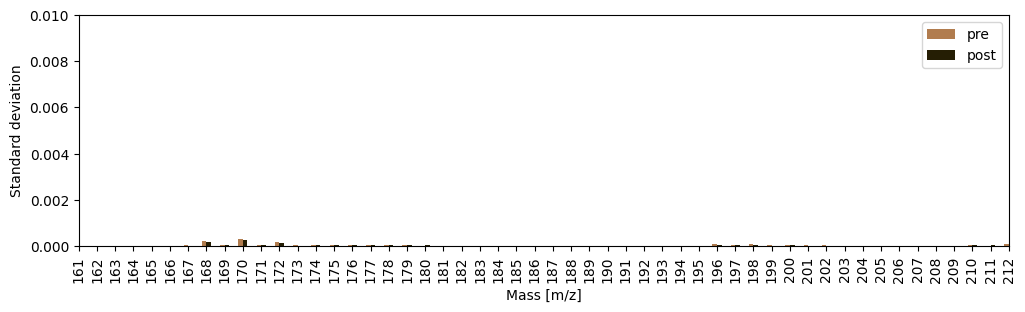

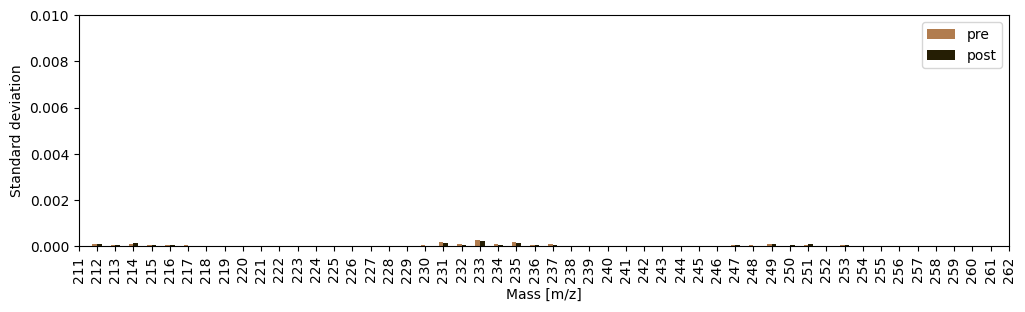

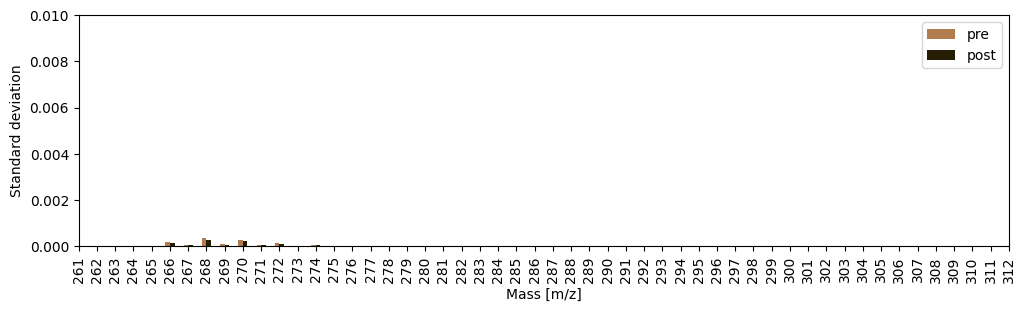

In [48]:
for i in range(6):
    axs = df1_std.plot(figsize=(12,3), x='index', y=['pre', 'post'], kind='bar', color=[colors[10], colors[11]])
    plt.xlim([10+50*i-1, 10+50*(i+1)])
    plt.ylim(0,0.01)
    plt.xlabel('Mass [m/z]')
    plt.ylabel('Standard deviation')
    # plt.title('Comparison between the Max Mass Spectra')
    plt.show()

    fig = axs.get_figure()
    fig.savefig(f'data/figure/1step_prepost{i}', bbox_inches='tight')

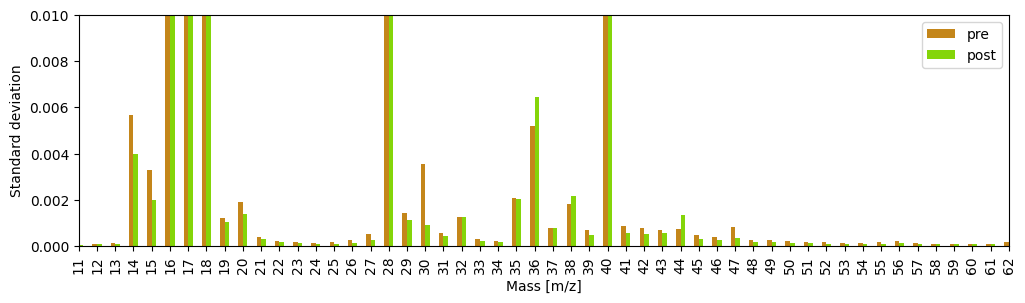

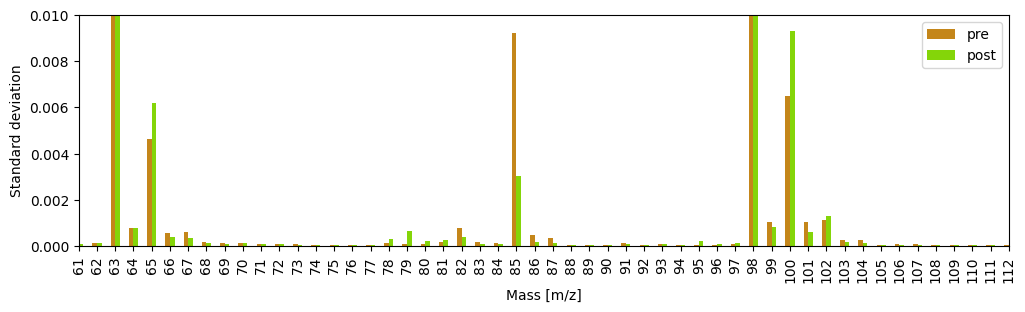

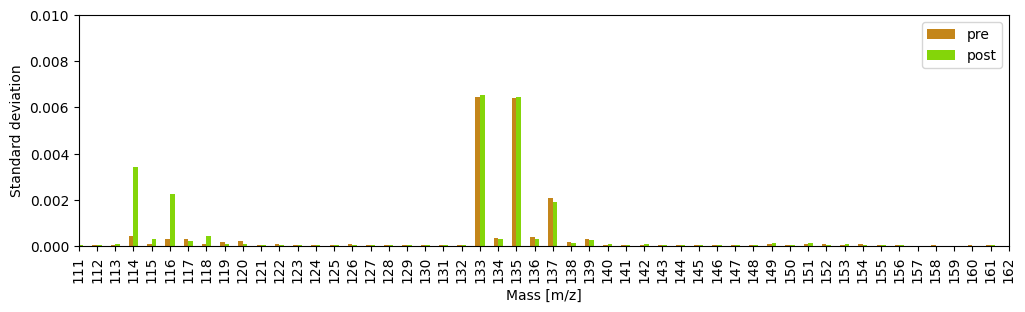

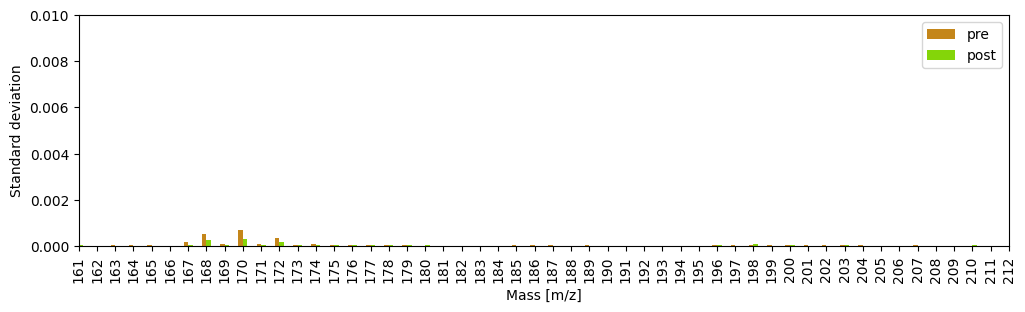

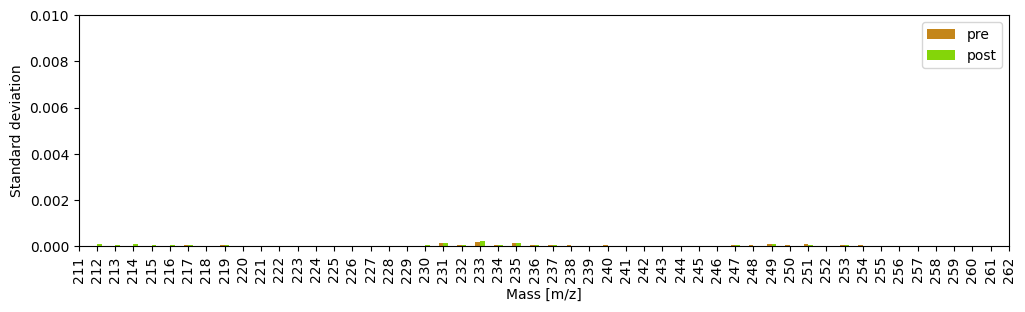

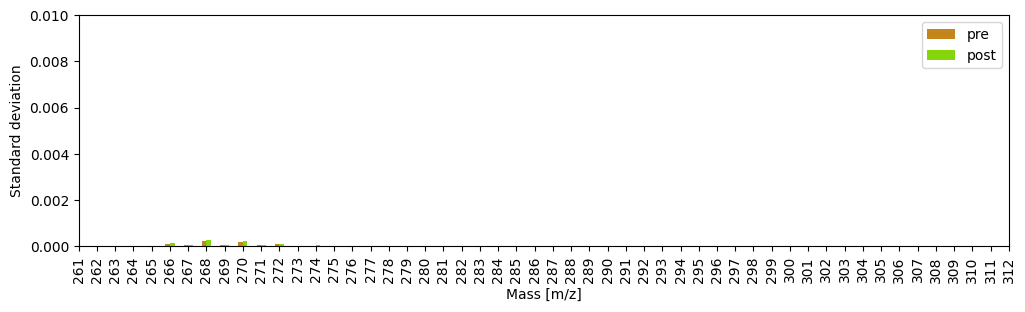

In [49]:
for i in range(6):
    axs = df2_std.plot(figsize=(12,3), x='index', y=['pre', 'post'], kind='bar', color=[colors[12], colors[14]])
    plt.xlim([10+50*i-1, 10+50*(i+1)])
    plt.ylim(0,0.01)
    plt.xlabel('Mass [m/z]')
    plt.ylabel('Standard deviation')
    # plt.title('Comparison between the Max Mass Spectra')
    plt.show()

    fig = axs.get_figure()
    fig.savefig(f'data/figure/2step_prepost{i}', bbox_inches='tight')